> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Operadores

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle\mkern-1.4mu\langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $

In [4]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
from IPython.display import display, Latex

## Operador
  

En un espacio vectorial, además de los vectores, es necesario entender la manera en que estos se pueden transformar entre sí

::::::{card} 
<b>Definición</b>: </i>Operador lineal</i> 

^^^

Un operador lineal es una aplicación $A:\Hil \to \Hil$  que transforma un vector  en otro 


$$
A: \ket{u} ~~\to ~~ \ket{v}   
$$
    
de forma <i>lineal</i>.   

::::::

La linealidad se refiere a la siguiente propiedad:

$$
A: (\alpha\ket{u} + \beta\ket{w})~~\to ~~ \ket{v} =\alpha A\ket{u} + \beta A\ket{w}
$$ 


::::::{admonition} Ejemplo
:class: tip

   
Un <i>operador</i>  fácil de visualizar es el operador de <i>rotación en un plano</i>. Dado un ángulo $\theta \in (0,2\pi)$ el operador $A = R(\theta)$ gira cualquier vector un ángulo $\theta$ en el sentido antihorario

    
Un vector en el plano ${\bf u} =  (u_1,u_2)$  es equivalente al número complejo $u = u_1 + i u_2$ en el plano complejo $V = {\mathbb C}$.

    
Escrito en polares, $u=|u|e^{i\phi}$,  sabemos que una rotación de ángulo $\theta$ es equivalente a añadirle dicho  ángulo a la fase 


$$
 v = R(\theta) u = |u| e^{i(\phi + \theta)} =  |u| e^{i\phi } e^{i\theta} = u\cdot e^{i\theta} 
$$  
Por tanto, para rotar un número complejo un ángulo $\theta$ basta con multiplicarlo por la fase $e^{i\theta}$, que se corresponde con el operador $R(\theta)$ en el espacio vectorial $V = \mathbb{C}$.   La propiedad fundamental de una rotación es la de mantener invariante el módulo  $|v| = |u|$.    
::::::


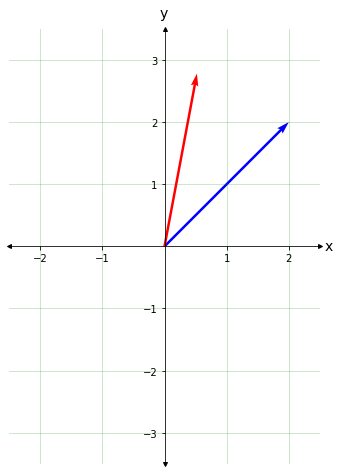

In [6]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

'Función que rota un vector tratándolo como un número complejo'
def R(u1,u2,theta):
        u = u1 + u2*1j
        v = u*np.exp(1j*theta) # u rotado un angulo theta
        return v.real,v.imag
    
'''v1 y v2 a partir de u1, u2 y theta'''
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


### Matriz de un operador
<a id='matriz_op'></a>

Dada una base $\{\ket{i}\}$ con $i=1,...,N$, podemos asociar a cada operador $A$, una matriz $A_{ij}$. Veamos por qué: escribamos los vectores $\ket{u}$ y $\ket{v} $ en la base $\{\ket{i}\}$

$$
\ket{u} ~=~ \sum_{i=1}^N u_i \ket{i}~ \sim ~\begin{pmatrix} u_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
~~~~~~~~~,~~~~~~~~
\ket{v} ~=~ \sum_{i=1}^N v_i \ket{i}~\sim ~\begin{pmatrix} v_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
$$

El hecho de que $\ket{v} = A\ket{u}$ donde  $A$ es un *operador lineal* quiere decir que existe una matriz  

$$
A ~\sim~ \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
$$

que relaciona las componentes de ambos vectores

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix}
$$
o, lo que es igual
$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, 
$$


::::::{admonition} Ejemplo
:class: tip


Continuando con el ejemplo del operador de rotación en un plano, hemos visto que las componentes de $u = u_1 + i u_2$ y las de $R(\theta)u = v = v_1 + i v_2$ se obtienen mediante la multiplicación por una fase pura 
\begin{eqnarray*}
v&=& u e^{i\theta} \\
\end{eqnarray*}
    
Vamos a desarrollar cada miembro en cartesianas, separando las partes real e imaginaria
    
\begin{eqnarray*}
v_1 + i v_2 &=& (u_1 + iu_2) (\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray*}

    
es decir las coordenadas del vector origen y el vector rotado imagen se relacionan en la  forma 


\begin{eqnarray*}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray*}


que podemos expresar en forma matricial
    
$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta &\cos\theta\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
    
  
    
    
::::::


## Base de Operadores  

Hay una clase de operadores muy simples que se puede formar a partir de dos vectores. No son los operadores e más generales, pero servirán como base para expresar cualquier operador lineal 

### Producto externo 
<a id='base_canonica'></a>

 Dependiendo del orden en que los compongamos, $~\braket{u}{v}~$ ó $~\ketbra{v}{u}~$, el resultado es  muy distinto


- El **producto interno**, o *producto escalar* es un *número complejo*


$$
 a = \braket{u}{v} = \braket{v}{u}^* 
$$

- El **producto externo**  es un *operador*


$$
A = \ketbra{v}{u}
$$

Para comprender por qué es un operador, observamos que dicha expresión aplicada a un vector $\ket{w}$ da otro, 

$$
A : \ket{w} ~\to ~ A\ket{w} =  \ket{v}\braket{u}{w}=\ket{v} \lambda  = \lambda \ket{v} 
$$ 

::::::{admonition} Notar
:class: note


    
1. El orden en que escribimos las cosas es relevante o no según los casos. 
Por ejemplo  $\braket{u}{v}$ y $\ketbra{v}{u}$ son objetos <i> radicalmente distintos</i>: el primero es un número y el segundo es un operador. En cambio $\ket{v} \lambda  = \lambda \ket{v}$, así como $\bra{u}\lambda = \lambda\bra{u}$, es decir,  los números complejos y los $kets$ o $bras$ pueden escribirse en cualquier orden (decimos que conmutan).

    
2. La acción del operador  $A = \ket{v}\bra{u}$ es muy fácil de <i>verbalizar</i>: 
     
    - el operador $A$ toma un vector $\ket{w}$ y lo convierte en otro  <i>paralelo</i> a $\ket{v}$ de módulo proporcional  a $\lambda=\braket{u}{w}$ 
    
    - si la proyección es nula $\lambda=0$, el operador <i>aniquila</i>, es decir, su imagen es el <i>elemento neutro</i>
::::::


La diferencia entre el *producto interno* $a=\braket{u}{v}$ y el *externo* $A=\ketbra{u}{v}$ tiene su reflejo en una base expresando ambos vectores, $\ket{u} = \sum_i u_i\ket{i}$ y $\ket{v} = \sum_j v_j \ket{j}$,  en componentes en una base ortonormal

-  el *número complejo* $a$  es el *producto escalar*

$$
 a = \braket{u}{v}  = \begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix}
\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}\, =  \sum_i u_i^*v_i
$$

-  la matriz $A_{ij}$    *representa* el operador $A$ en la base $\{\ket{i}\}$

$$
A = \ketbra{v}{u} ~\sim ~\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}
\begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix} ~=~ 
\begin{pmatrix} v_1 u_1^* & v_1u_2^* & ... & v_1 u_N^* \\
v_2 u_1^* & v_2 u_1^*& ... & v_2 u_N^* \\ \vdots & \vdots  & \ddots & \vdots \\
v_N u_1^* & & ... & v_N u_N^* \end{pmatrix} ~ = ~A_{ij}
$$


### Base canónica de operadores
<a id='base_canonica'></a>

Consideremos el *producto externo* de dos elementos de la base ortonormal
$\ketbra{i}{j}$


La acción  sobre otro vector de la base, $\ket{k}$, es 


$$
 \ket{i}\braket{j}{k}  ~=~ \left\{ \begin{array}{rl}
0 & {\rm si} ~~k\neq j \\ \ket{i} & {\rm si} ~~ k=j \end{array} \right\} ~= ~ \ket{i} \delta_{jk}
$$

 La matriz asociada  tiene sólo un 1 en el elemento $(ij)$ y cero en todos los demás. Por ejemplo, supongamos que 
$N=4$ 



$$
\ketbra{2}{3} ~\to ~~
 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix} = 
\begin{pmatrix}
0 &  0 & 0 &  0 \\  0 &  0 & 1&  0 \\ 0 &  0 & 0 &  0 \\ 0 &  0 & 0 &  0
\end{pmatrix} ~~\Rightarrow ~~ A_{ij} = \delta_{i2}\delta_{j3}
$$


::::::{card} 
<b>Teorema</b>:  

^^^

Los operadores $\ketbra{i}{j}$ forman una base para cualquier operador lineal $A$, donde las componentes son 
los <i>elementos de matriz</i> $A_{ij}$ 

$$
A ~=~ \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} 
$$
::::::


<details>
<summary><p style="text-align:left"> >><i>Demostración</i> </p></summary>
Verifiquemos que actúa de la forma correcta

$$
\begin{array}{rcl}
A |u\rangle &=&  \sum_{i,j} A_{ij} \ketbra{i}{j}  \left(\sum_k u_k |k\rangle \right) \\
&\stackrel{\rm linealidad}{=} \rule{0mm}{6mm}& \sum_{i,j} \sum_k A_{ij} | i\rangle  \,   u_k \langle j| k\rangle \nonumber\\
&\stackrel{\rm ortonormalidad}{=}\rule{0mm}{6mm}& \sum_{i,j,k} A_{ij} | i\rangle  \,   u_k \delta_{jk}\\
&=\rule{0mm}{6mm}&\sum_{ij} A_{ij}\,|i\rangle \, u_j= \sum_i \left(\sum_{j} A_{ij}\, u_j\right)  |i\rangle    \\
&=\rule{0mm}{6mm}&\sum_i v_i \ket{i} \nonumber\\
&=\rule{0mm}{6mm}&   | v\rangle
\end{array}
$$
:::


#### Elementos de matriz

El producto escalar muestra ahora su utilidad de nuevo. 
De la misma manera que obteníamos las componentes de un vector proyectando sobre un elemento de la base

$$
v_i = \braket{i}{v}
$$

ahora podemos obtener los *elementos de matriz* de un operador $A$ en la forma

$$  A_{ij} = \bra{i} A \ket{j} $$

::::::{admonition} Ejercicio
:class: tip


comprueba la consistencia de las expresiones $~A = \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} $ y $~A_{ij} = \bra{i} A \ket{j}$
::::::


::::::{admonition} Resumen
:class: attention

     
Dada una base $\{\ket{i}\}$ podemos expresar un operador mediante una matriz $A_{ij}$. La relación concreta es 

- como operador $\to ~ A = \sum_{ij} A_{ij}\ketbra{i}{j}$

- como elemento de matriz $\to ~ A_{ij} = \bra{i}A\ket{j}$
   
::::::


#### Relación de completitud    
    
La acción del operador identidad es 

$$
I\ket{v} = \ket{v}
$$

En particular, sobre todo elemento de la base $I\ket{i} = \ket{i}$. En otras palabras,
el operador identidad $I$ tiene por matriz $I_{ij}=\delta_{ij}={\rm diagonal}\, (1,1,...,1)$ con lo que


$$
I= \sum_{ij} \delta_{ij}\ketbra{i}{j}  = \sum_{i}  \ketbra{i}{i} 
$$

Esta expresión se conoce también como <b>relación de completitud</b> o, también, <b>relación de cierre</b> y se utiliza muy frecuentemente.


::::::{admonition} Notar
:class: note


La relación de completitud es, en realidad, una propiedad de  <b> cualquier base</b>. Dicho de otro modo, si $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$ son, ambas, bases entonces $I\ket{e_i} = \ket{e_ i}$ y $I\ket{\tilde e_j} = \ket{\tilde e_j}$, entonces $+1$ es el único autovalor de $I$ en cualquier base, y la descomposición espectral da


$$
I =  \sum_{i}  \ketbra{e_i}{e_i} =  \sum_{j}  \ketbra{\tilde e_j}{ \tilde e_j}\, .
$$
::::::


### Cambios de base

La *relación de cierre* siempre se puede insertar en cualquier momento del cálculo. Se utiliza con frecuencia para efectuar cambios de base. Efectivamente insertando la identidad delante de un elemento de la base

$$
\begin{array}{rcl}
\ket{\tilde e_j} &=& I \ket{\tilde e_j} =  \sum_{i}  \ket{e_i}\braket{e_i}{\tilde e_j} = \sum_i \braket{e_i}{\tilde e_j} \ket{e_i} = \sum_i U_{ij}\ket{e_i}\\
\rule{0mm}{8mm}
\ket{e_j} &=& I \ket{e_j} = \sum_{i}  \ket{\tilde e_j}\braket{\tilde e_j}{e_i} = \sum_i \braket{\tilde e_j}{e_i} \ket{\tilde e_j} = \sum_i U^{-1}_{ij}\ket{\tilde e_i}
\end{array}
$$

donde la *matrices de cambio* son

$$
\boxed{
U_{ij} = \braket{e_i}{\tilde e_j}~~~~,~~~~ U^{-1}_{ij} = \braket{\tilde e_i}{e_j} 
}
$$

Notar que la *matriz inversa* es igual a la *adjunta*

$$
U^{-1}_{ij} = \braket{\tilde e_i}{ e_j } = \braket{ e_j }{\tilde e_i}^* = (U_{ji})^* = U^\dagger_{ij}
$$

Esto ocurre si y sólo si las bases $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$ son ambas ortonormales

De la misma manera podemos relacionar las componentes de un vector en ambas bases 

$$
\ket{u}  =  \sum_i u_i  \ket{e_i} =   \sum_i \tilde u_i  \ket{\tilde e_i}
$$

Las componentes son, en cada base

$$
u_i = \braket{e_i}{u} ~~~~~~~~~~ , ~~~~~~~~~ \tilde u_i = \braket{\tilde e_i}{u}
$$

Insertando la identidad

$$
u_i = \bra{e_i}I\ket{u} = \bra{ e_i}\left( \sum_j \ket{\tilde e_j}\bra{\tilde e_j}\right) \ket{u} = 
\sum_j \braket{e_i}{\tilde e_j}\braket{\tilde e_j}{u} = \sum_j U_{ij} \tilde u_j
$$

Es decir

$$
\tilde u_i = \sum_j U_{ij} u_j 
$$



Igualmente podemos hallar la regla de transformación de las matrices asociadas a un operador en dos bases distintas

$$
\begin{array}{rcl}
\tilde A_{ij} ~&=&~ \bra{\tilde e_i} A \ket{\tilde e_i} ~=~   \bra{\tilde e_i} I  A I  \ket{\tilde e_i}\\ \rule{0mm}{10mm}
&=& \sum_{k,l=1}^N \braket{\tilde e_i}{e_k}\bra{e_k}A\ket{e_l} \braket{e_l}{\tilde e_j}\\ \rule{0mm}{8mm}
&=& \sum_{k,l=1}^N U^\dagger_{ik} A_{kl} U_{lj}
\end{array}
$$

::::::{admonition} Ejercicio
:class: tip

 
La matriz $\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}$ representa un operador $\sigma_y$ en la base $\{\ket{0},\ket{1}\}$. Escribe $\sigma_y$ en la base $\{\ket{\!+\!i}= \frac{1}{\sqrt{2}}(\ket{0}+i \ket{1}),\ket{\!-\!i}= \frac{1}{\sqrt{2}}(\ket{0}-i \ket{1})\}$
    
::::::


::::::{admonition} Ejercicio
:class: tip

    
Escribe en python una función $basis\_change$ que reciba una matriz $U_{ij}$ de cambio de base $\ket{\tilde e_j} = \sum_i{U_{ij}}\ket{e_i}$, la componentes $v_i$ de un vector, ó $A_{ij}$ de un operador, y devuelva las componentes $\tilde v_i~$ ó $~\tilde A_{ij}$ en la nueva base. 
::::::


## El Espacio Vectorial $\Lin(\Hil)$

El <i>conjunto</i> de **todos** <i>los operadores lineales</i> sobre un espacio vectorial $\Hil$ tiene, de forma natural, una estructura de espacio vectorial que denominamos $\Lin(\Hil)$

Dados dos operadores,  $A$ y $B$ tanto la suma $C = A+B$ como la multiplicación por un número complejo $D=\lambda A$ son *nuevos operadores* definidos por su acción sobre un vector cualquiera $\ket{v}\in \Hil$


$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$


$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$

Si $\Hil$ tiene dimensión $N$, un *operador general* $A\in \Lin(\Hil)$ se especifica mediante una matriz de $N^2$ números complejos $\Rightarrow A = A_{ij}\ket{e_i}\bra{e_j}$. 
En otras palabras: la dimension (compleja) del espacio  de operadores lineales es $ {\rm dim}_{\bf C}(\Lin(\Hil)) = N^2\,  
$

### Operador Adjunto
<a id='opadj'></a>

    
La conjugación *adjunta* se puede extender a ${\rm Lin}(\Hil)$


$$
\dagger ~\to ~
\left\{
\begin{matrix}
z & \leftrightarrow  &  z^* \\
|u\rangle & \leftrightarrow &   \langle u | \\
A & \leftrightarrow & A^{\dagger}
\end{matrix}
\right.
$$

y hay <b>dos reglas más</b> que permiten aplicar $\dagger$ a sumas y productos de <i> objetos </i> $a \in\{z,\ket{u},A\}$


- *linealidad* $( a + b)^\dagger = a^\dagger + b^\dagger $

- *trasposición* $(ab)^\dagger = b^\dagger a^\dagger$ (sólo relevante cuando $a$ y $b$ no conmuten)

Por ejemplo
$$
\big(  A(z\ket{u})\big)^\dagger  = z^*\bra{u}A^\dagger 
$$


#### Matriz adjunta

Estas reglas nos permiten obtener el adjunto de un operador

$$
A^\dagger = \left(\sum_{ij} A_{ij}\ketbra{i}{j}\right)^\dagger  = \sum_{ij}\big( A_{ij}\ketbra{i}{j}\big)^\dagger = \sum_{ij} A_{ij}^*  \ketbra{j}{i}=  \sum_{ji} \, A_{ji}^*\ketbra{i}{j}
$$

donde en la última ecuación hemos intercambiado los *nombres* de los índices $i\leftrightarrow j$.
Vemos que la matriz que representa $A^\dagger$ es la *matriz adjunta* de $A_{ij}$, es decir, la traspuesta y conjugada

$$
(A^\dagger)_{ij} = A^*_{ji} = (A^{*}_{ij})^t \equiv (A_{ij})^\dagger
$$

donde $^\dagger$ significa el adjunto de un operador a la izquierda, y de una matriz a la derecha.




### Traza


::::::{card} 
<b>Definición</b>:  

^^^
La traza de un operador $A$ se define como la suma de sus elementos de matriz diagonales <u> en cualquier base </u>        

    
$$
\tr A = \sum_ i \bra{e_i} A\ket{e_i} =  \sum_{i} A_{ii} 
$$

::::::


Para ser consistente esta definición es necesario probar que no importa la base utilizada

::::::{card} 
<b>Lema</b>:  

^^^
La traza de un operador es <i>independiente de la base</i> en la que se calcule
::::::
:::{dropdown} Prueba
\begin{eqnarray}
{\rm tr} A  &=&\sum_i A_{ii} =\sum_{i} \bra{i}A\ket{i} =\sum_{i} \bra{i}A\left( \sum_j\ketbra{\tilde j}{\tilde j}\right)\ket{i}
\nonumber\\
&=& \sum_{ij}\bra{i}A\ket{\tilde j} \braket{\tilde j}{i} = \sum_{ij}\braket{\tilde j}{i}\bra{i}A\ket{\tilde j}  \nonumber\\
&=& \sum_{j} \bra{\tilde j}\left(\sum_i\ketbra{i}{i}\right) A \ket{\tilde j}= \sum_{j} \bra{\tilde j}A\ket{\tilde j}\nonumber\\
&=& \sum_j \tilde A_{jj}
\end{eqnarray}
:::

La traza posee dos propiedades importantes
- linealidad : 

$$
{\rm tr} (A + B ) = {\rm tr}A + {\rm tr}B
$$



- ciclicidad: la traza es invariante bajo permutaciones  cíclicas de los operadores en su argumento. Por ejemplo, para tres operadores $A, B$ y $C$

$$
{\rm tr}(ABC)= {\rm tr}(BCA) 
$$

- aniquila conmutadores:
para un producto de dos operadores, el anterior resultado implica que la *traza de un conmutador es cero*. Dicho de otra forma

$$
{\rm tr}(AB) = {\rm tr}(BA) ~~~\Rightarrow ~~~~{\rm tr}([A,B]) = 0 \, .
$$

::::::{admonition} Notar
:class: note

sea el operador $A = \ketbra{u}{v}$ entonces $ \tr \left(\rule{0mm}{5mm}\ketbra{u}{v}\right) = \braket{v}{u}$.
Efectivamente

$$ \tr \left(\rule{0mm}{5mm}\ketbra{u}{v}\right) = \sum_i \braket{e_i}{u}\braket{v}{e_i} = \sum_i \braket{v}{e_i} \braket{e_i}{u} = \bra{v}\left(\sum_i \ketbra{e_i}{e_i}\right) \ket{u} = \braket{v}{u}
$$
::::::


::::::{admonition} Ejercicio
:class: tip

demuestra la ciclicidad de la traza
::::::


<a id='#oper_scalprod'></a>

### $\Lin(\Hil)$ como un espacio de Hilbert

Para transformar el espacio vectorial $\Lin(\Hil)$ en un espacio de Hilbert sólo es necesario definir un producto escalar hermítico entre dos elementos 

<a id='trace_norm'></a>
::::::{card} 
<b>Definición</b>: </i>producto escalar</i> 

^^^
     
dados dos operadores $A, B \in \Lin(\Hil)$  definimos su <i> producto escalar </i>  $( A, B)\in {\mathbb C}$
 

$$
( A, B)\equiv {\rm tr}\left( A^\dagger B \right) 
$$
::::::


En una base tenemos que

$$
(A,B) = \sum_{ij} A^\dagger_{ij} B_{ji} = \sum_{ij} A^*_{ji} B_{ji}
$$

mientras que 

$$
(B,A) = \sum_{ij} B^\dagger_{ij} A_{ji} = \sum_{ij} B^*_{ji} A_{ji}
$$

Se sigue que  $(B,A) = (A,B)^*$. Además es trivial comprobar que  $(A,B+C) = (A,B) + (A,C)$, por lo que se trata de un producto escalar sesquilineal o hermítico. 

<a id='#oper_norm'></a>

#### $\Lin(\Hil)$ como un espacio normado

Una **norma** definida sobre $\Lin(\Hil)  $es un una función real $ A\to  \| A\| \in {\mathbb R}$ con las propiedades 
que se han definido en una [sección anterior](../00_Formalismo/01_Vectores.ipynb#norm)

<a id='trace_norm'></a>
::::::{card} 
<b>Definición</b>: </i>$p$-norma Shatten</i> 

^^^

Dado un operador $A\in \Lin(\Hil)$ la función  
 

$$
\| A \|_p =  \left({\rm tr} \left(A^\dagger A\right)^{p/2} \right)^{1/p}
$$

define una norma, denominada <b>$p$-norma de Shatten</b>.
::::::


Los tres casos más frecuentes son

- $p=1$ **norma de la traza** $~\Rightarrow ~  \| A \|_1 =  {\rm tr} \sqrt{A^\dagger A}$



Esta norma es igual a la suma de los valores singulares de $A ~\Rightarrow ~\| A \|_1  = \sum_i^r s_i$, donde $s_i^2$ son los autovalores de $A^\dagger A$


- $p=2$ **norma de Frobenius** $~\Rightarrow ~ \| A \|_2 =  \sqrt{{ \rm tr} A^\dagger A }$


La norma de Frobenius es la que se obtiene a partir  del producto escalar $\|A\|_2 = (A,A)$


- $p=\infty$ **norma espectral** $~\Rightarrow ~  \| A \|_\infty = \lim_{p\to \infty} \| A \|_p$

Puede demostrarse que la norma espectral es equivalente a la siguiente definición

$$
\|A\|_\infty = \hbox{max}_{\ket{u}\in \Hil}\{ \|A\ket{u}\| ~~\hbox{con} ~ \|\ket{u}\| = 1\}
$$


::::::{admonition} Ejercicio
:class: tip


Escribe, en python, una función $trace\_norm(A)$, que calcule la norma de la traza de un operador. 
::::::


#### Distancia de traza

<i>Cualquier norma</i> permite definir una noción de *distancia* o *diferencia* entre dos operadores. 

::::::{card} 
<b>Definición</b>: </i>Distancia de traza</i> 

^^^
     
Se define la  <b> distancia de traza</b> entre dos operadores $A$ y $B$ como la norma de la diferencia
 

$$
d(A,B) = \| A - B \|_1 
$$
::::::


## Clases de operadores

Dentro de $\Lin(\Hil)$ podemos definir subconjuntos de operadores que mantienen ciertas propiedades importantes. Algunos formarán subespacios vectoriales, y otros no.
Podemos definir dichas  **clases de operadores** pidiendo que satisfagan algúna *condición* o *restricción*.

### Operador Unitario
<a id='opunit'></a>

::::::{card} 
<b>Definición</b>:  

^^^
    
Un <i>operador unitario</i> $U$ es tal que su <i>adjunto</i> es igual a su <i>inverso</i>
  
$$
U^\dagger = U^{-1}  \, 
$$

::::::


Naturalmente, esta ecuación se traduce en la misma ecuación para las matrices asociadas en *cualquier base*

$$
(U_{ij})^\dagger = U_{ji}^* = U^{-1}_{ij}
$$

Veamos ahora por qué hemos definido esta clase de operadores.

::::::{card} 
<b>Teorema</b>:  

^^^
    
La acción de un <i>operador unitario</i> conserva <i>intacto el producto escalar</i> de dos vectores cualesquiera. 

::::::
:::{dropdown} Demostración

Sea $U$ un operador unitario, y $\ket{\varphi'}=U\ket{\varphi}$ y $\ket{\psi'} = U\ket{\psi}$
dos vectores transformados por $U$, entonces

    
$$
\braket{\varphi'}{\psi'} = \left(\bra{\varphi}U^\dagger\right)U\ket{\psi} = \bra{\varphi} U^\dagger U \ket{\psi} = 
\braket{\varphi}{\psi}
$$



particularizando para $\ket{\varphi} = \ket{\psi}$ tenemos que un operador unitario *conserva la norma*.

$$
\|U \ket{\varphi}\| = \|\ket{\varphi}\|
$$
:::


Si conserva el producto escalar $\Rightarrow$ entonces conserva  la <i>norma</i> de cualquier vector $\Rightarrow$ por tanto, conserva la *distancia* entre dos vectores $ d (\ket{v},\ket{w})= \| (\ket{v}-\ket{w}) \| $.

::::::{admonition} Notar
:class: note


- La <i>combinación lineal</i> de operadores unitarios <b>no es</b> unitaria


$$
 (a U+ bV)^\dagger = a^* V^\dagger+ b^* U^\dagger = a^* V^{-1}+ b^* U^{-1} \neq  (a U+ b V)^{-1}
$$

$~$ Matemáticamente esto quiere decir que los operadores unitarios no forman un subespacio vectorial de $\Lin(\Hil)$


- La <i>composición</i> de  operadores unitarios  <b>es</b> unitaria. Si $W = UV$ entonces


$$
W^\dagger = (UV)^\dagger = V^\dagger U^\dagger = V^{-1}U^{-1} = (UV)^{-1} = W^{-1}
$$ 

$~$ Matemáticamente esto quiere decir que los operadores unitarios forman un <i>grupo</i>: el grupo unitario $U(N)$ si dim$(\Hil)=N$.
::::::


#### Bases ortonormales

- Como caso particular, aplicando un operador unitario $U$ a una base ortonormal $\{\ket{e_i}\}$ obtenemos otra base ortonormal $\{\ket{\tilde e_i}\}$



$$
\braket{\tilde e_i}{\tilde e_j} = \bra{\tilde e_i}U^\dagger U\ket{\tilde e_j} = \braket{e_i}{e_j} = \delta_{ij}
$$



- Inversamente, dadas dos bases ortonormales, $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$, el operador que las relaciona es un operador unitario
    
$$ 
 \begin{array}{rcl} 
U = \sum_i \ketbra{\tilde e_i}{e_i} & \Rightarrow &  U\ket{e_j} = \ket{\tilde e_j} 
 \\ \rule{0mm}{10mm}
U^\dagger = \sum_i \ketbra{e_i}{\tilde e_i}  & \Rightarrow &    U^\dagger\ket{\tilde e_j} = \ket{e_j} ~~~\Rightarrow ~~~U^\dagger = U^{-1}
 \end{array}
$$


In [10]:
'definimos una matriz'
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
array_to_latex(U)

<IPython.core.display.Latex object>

In [8]:
'getH es un método de la clase matrix que devuelve la matriz conjugada hermítica'
Uadj=U.getH() 
array_to_latex(Uadj)

<IPython.core.display.Latex object>

In [7]:
'comprobamos que U es unitaria'
array_to_latex(np.dot(Uadj,U))

<IPython.core.display.Latex object>

### Operador Normal
<a id='opnormal'></a>
    
::::::{card} 
<b>Definición</b>:  

^^^
un operador $N$  es <i>normal</i> si conmuta con su adjunto
   
$$
NN^\dagger = N^\dagger N
$$  
::::::


Esta propiedad afirma que $N$ y su adjunto, $N^\dagger$ conmutan. 
La siguiente propiedad hace de los operadores normales, objetos muy importantes 

::::::{card} 
<b>Teorema</b>:  

^^^
$N$ es un operador <i>normal</i> si y sólo si <u>existe</u> una base ortonormal, $\{\ket{e_i}\}$, en la cual, la matriz $N_{ij}$ que lo representa es diagonal
    
$$
N_{ij} = \bra{e_i}N\ket{e_j}  =  
\begin{bmatrix} \lambda_1 &  & &  \\ & \lambda_2 & &  \\ & & \ddots &  \\ & & & \lambda_D \end{bmatrix}
$$
::::::


### Operador Hermítico
<a id='ophermit'></a>

::::::{card} 
<b>Definición</b>:  

^^^
un operador  $H$ es <i>Hermítico</i> (o <i>autoadjunto</i>)  si  verifica la  ecuación 
    
$$
H = H^\dagger 
$$   
::::::


La matriz asociada a un operador hermítico también se llama hermítica, y coincide con su traspuesta y conjugada


$$
H_{ij} = H^\dagger_{ij} \equiv   H^*_{ji}   
$$

Evidentemente, un operador hermítico conmuta con su adjunto. Por tanto es un caso particular de  *operador normal*.




A partir de cualquier operador $C\neq C^\dagger $ siempre podemos construir un operador hermítico $H=H^\dagger$ mediante la combinación lineal

$$
H = C + C^\dagger
$$

Esto se extiende trivialmente a las matrices que los representan en cualquier base

$$
H_{ij} = C_{ij} + C_{ji}^*
$$ 


::::::{admonition} Notar
:class: note


- La combinación lineal de operadores hermíticos  con coeficientes reales <b>es</b>  hermítica 

$$
C^\dagger = (a A + b B)^\dagger = a^* A^\dagger + b^* B^\dagger = aA + b B = C
$$
    
Matemáticamente: los operadores autoadjuntos forman un subespacio vectorial real $\hbox{Her}(\Hil) \subset \Lin(\Hil)$.


    
- La composición de operadores hermíticos, en general <b>no es</b> hermítica

$$
(A B)^\dagger = B^\dagger A^\dagger = BA \neq AB
$$
::::::


### Operador semi-definido positivo

::::::{card} 
<b>Definición</b>:  

^^^
 decimos que un operador  $A$ es <i>semi-definido positivo </i>  $A\geq 0$ (o <i>no-negativo</i>)  si  verifica que  


$$
\bra{u} A\ket{u} \geq 0 
$$  

para todo $\ket{u}\in \Hil$. 
::::::

 Si la desigualdad es estricta $\bra{u} A\ket{u} > 0 \, ~\forall \ket{u}$, decimos que $A$ es un *operador positivo*, $A>0$.


El siguiente teorema es el equivalente al hecho de que un número real no-negativo $a\geq 0$ admite una raíz cuadrada real

::::::{card} 
<b>Teorema</b>:  

^^^
 un operador  hermítico $A=A^\dagger$, es semi-definido positivo $A\geq 0$   si y sólo si  <u>existe</u> otro operador $B$ tal que 


$$   
A = B^\dagger B
$$   
::::::


<a id='opproyec'></a>
### Proyectores


El operador $P = \ketbra{u}{u}$ *proyecta* cualquier vector en la dirección de $\ket{u}$

$$
P \ket{w} = \ket{u}\braket{u}{w} = a \ket{u}
$$

donde $a = \braket{u}{w}$ es la *proyección*. De la forma de $P$ se siguen dos propiedades importantes 

- es hermítico $~\Rightarrow~ P^\dagger = (\ketbra{u}{u})^\dagger =  \ketbra{u}{u} = P$


- es idempotente $~\Rightarrow~ P^2 = \ket{u}\braket{u}{u}\!\bra{u} = \ketbra{u}{u} = P $

De hecho esta dos propiedades bastan para caracterizar un operador como proyector

::::::{card} 
<b>Definición</b>:  

^^^
un <i>proyector</i> es un operador hermítico $P=P^\dagger$ que verifica la ecuación


$$
P^2 = P
$$
::::::


::::::{admonition} Notar
:class: note


- El proyector <b>no tiene inverso</b>. Si existiera $P^{-1}$, multiplicando por él la ecuación $P^2=P$ llegaríamos a una contradicción $P = I$. 

    
- El proyector es un operador <b>no-unitario</b>: en general, la proyección <i>reduce</i> la norma 

$$
\| P\ket{w}\|^2 = \bra{w}P^\dagger P\ket{w} = \bra{w} P\ket{w}= \braket{w}{u}\!\braket{u}{w} = |\braket{u}{w}|^2 < \|\ket{u}\|\|\ket{w}\| = 1  
$$  

donde hemos aplicado la <i>desigualdad de Cauchy Schwarz</i> estricta si suponemos que $\ket{u}\neq\ket{w}$.
::::::


####  Matriz asociada a un proyector

Sea $\{\ket{e_i}\}$ una base ortonormal. El operador $P_1 = \ketbra{e_1}{e_1}$ proyecta cualquier vector sobre su componente a lo largo de $\ket{e_1}$.    

En forma matricial

$$
 \ketbra{e_1}{e_1} = \begin{pmatrix} 1 & 0 & ...& 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \vdots\\ 0 \end{pmatrix} =
 \begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix}
$$

de modo que

$$
    \ket{e_1}\!\braket{e_1}{u} ~= ~\begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{pmatrix}
 = \begin{pmatrix} u^1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = u^1 \ket{e_1}
$$
    

   
Si $\ket{u} = \sum_i u^i\ket{e_i}$ es un vector unitario  $\|\ket{u}\|=1$, entonces el proyector a lo largo de $\ket{u}$ viene dado por

$$
P(u) = \ketbra{u}{u} = \sum_{i,j} u_i u^*_j \ketbra{e_i}{e_j}
$$

Es decir, le está asociada una matriz dada por $P_{ij}=u_iu^*_j$. Es trivial verificar que 

$$
P^2_{ij} = \sum_k P_{ik}P_{kj} = \sum_j u_i u^*_k u_k u^*_j = u_i\left(\sum_k u^*_k u_k\right) u_j = u_i u_j^* = P_{ij}
$$

como corresponde a un proyector.
    

#### Proyector ortogonal



Sea $P = \ketbra{u}{u}$ un proyector a lo largo de un vector $\ket{u}.~$
Entonces el operador $ P_\perp = I - P$ verifica que

- es proyector 

$$
~~ P_\perp^2 = ( I - P)( I - P) = I - 2P + P^2 = I-P = P_\perp 
$$

- es perpendicular a $P$ 

$$
P_\perp P = (I - P) P = P - P^2 = P - P =  0 
$$

- la identidad, $I$ se puede descomponer como 

$$I =  P + P_\perp$$

Siempre podemos descomponer cualquier  otro vector $\ket{\psi}$ en sus proyecciones paralela y perpendicular a $\ket{u}$

$$
\ket{\psi} = ( P + P_\perp) \ket{\psi} = a \ket{u} + b \ket{u_\perp} 
$$

donde $a = \braket{u}{\psi}$ y  $b = \braket{u_\perp}{\psi}$. 

Los tres vectores  $\ket{\psi}, \ket{u}$ y $\ket{u_\perp}$  están en un mismo hiperplano 
::::{figure} figuras/Projectors.png
:name: fig_ref
:width: 400px
:align: center
::::



In [13]:
d = 3
'generamos un vector aleatorio'
u = tQ.random_ket(d)
#display(array_to_latex(u))

'construimos los proyectores paralelo y perpendicular'
P_par = tQ.ket_bra(u,u);
P_perp = np.identity(d) - P_par

#display(array_to_latex(P_par))
#display(array_to_latex(P_perp))

In [20]:
' verificamos la propiedad  P^2 = P, y la ortogonalidad '
A = P_par@P_par - P_par
B = P_perp@P_perp - P_perp
C = P_par@P_perp

#display(array_to_latex(A))
#display(array_to_latex(B))
display(array_to_latex(C))

<IPython.core.display.Latex object>

In [21]:
' obtener las proyecciones paralela y perpendicular de otro vector v'
v = tQ.random_ket(d)

v_par = np.dot(P_par,v)
v_perp = np.dot(P_perp,v)

' verificar perpendicularidad'
print(np.round(tQ.braket(v_par,v_perp),4))

0j


::::::{admonition} Ejercicio (reflector) 
:class: tip


Dado un vector unitario $\ket{u}$, escribe 
    
    
- el operador $R_u^{\perp}$ que <i>refleja</i> la componente perpendicular a $\ket{u}$ de cualquier  vector $\ket{\psi}$   


- el operador $R_{u}^{\|}$ que <i>refleja</i> la componente paralela a $\ket{u}$ de cualquier  vector $\ket{\psi}$  
  
    
::::::


#### Proyectores sobre un subespacio

Consideremos una base ortonormal $\{\ket{e_i}\}~,i=1,...,N $  de $\Hil$ y dividámosla en dos subconjuntos

$$
\{\ket{e_i}\},~ i=1,...,N_1 ~~~~~~~,~~~~~~~~\{\ket{e_{j+N_1}},~j=1,...,N_2   
$$

Cualquier vector admite una descomposición ortogonal 

\begin{eqnarray}
\ket{\psi} &~=~& \sum_{i=1}^N a_i \ket{e_i}   ~= ~ \sum_{i=1}^N a_i \ket{e_i} + \sum_{i=1}^{N_2} a_{i+N_1} \ket{e_{i+N_1}} ~\equiv ~ \ket{\psi_1} + \ket{\psi_2}\rule{0mm}{5mm}
\end{eqnarray}

con $\braket{\psi_1}{\psi_2} = 0$. 

Decimos que el espacio $\Hil$ se descompone en la *suma directa de subespacios ortogonales*

$$
\Hil = \Hil_1 \oplus \Hil_2 
$$

de dimensiones $N_1 + N_2 = N$,


<hr>
Los operadores 

$$
P_1 = \sum_{i=1}^{N_1} \ketbra{e_i}{e_i} ~~~~~~~,~~~~~~~~ P_2 = \sum_{i=1}^{N_2} \ketbra{e_{i+N_1}}{e_{i+N_1}}
= I - P_1
$$

verifican la ecuación que define un proyector $P_1^2 = P_1,~P_2^2 = P_2$. Su acción extrae, de un vector dado, la componente sobre el subespacio asociado

$$
P_1 \ket{\psi} ~=~
\sum_{i=1}^{N_1} a_i \ket{e_i} ~=~ \ket{\psi_1}
$$

$$
P_2 \ket{\psi} ~=~ 
\sum_{i=1}^{N_1} a_{i+N_1} \ket{e_{i+N_1}} ~=~ \ket{\psi_2}
$$

Claramente verifican

$$
(P_1 + P_2)\ket{\psi} = \ket{\psi}
$$

En resumen, vemos que satisfacen 

$$
P_1 P_2 = P_2 P_1  = 0 ~~~,~~~~P_1 + P_2 = I
$$


::::::{admonition} Notar
:class: note

    
proyectar sobre un subespacio no es lo mismo que  proyectar a lo largo de un vector. 
En particular $P_1 \neq P_v = \ketbra{v}{v}$ donde $\ket{v} =\frac{1}{\sqrt{N}} \sum_{i=1}^N \ket{e_i}$. El operador $P_v$ proyectaría cualquier vector en la dirección de $\ket{v}$.
Por ejemplo, con $N=2$ y $\ket{v} = \frac{1}{\sqrt{2}}\big(\ket{e_0} + \ket{e_1}\big)$ encontramos

$$
P_v   ~=~ \frac{1}{2}\big(\ket{e_0} + \ket{e_1}\big)\big(\bra{e_0} + \bra{e_1}\big)\neq \ketbra{e_0}{e_0} + \ketbra{e_1}{e_1} ~=~ P_1
$$
::::::


## Autovalores y autovectores
        


::::::{card} 
<b>Definición</b>: </i>Autovalores y autovectores</i> 

^^^

Existen vectores, $\ket{\lambda}$ para los cuales la <i>la acción de un operador</i> $A$ devuelve un vector <i>paralelo</i> 

$$
A\ket{\lambda} = \lambda \ket{\lambda}\, 
$$
    
Decimos que $\ket{\lambda}$ es un autovector (o vector propio) de $A$ con autovalor (o valor propio) asociado $\lambda\in {\mathbb C}$ 
::::::


Supongamos que $A$ tiene $d$ vectores propios $\ket{\lambda_j} = \sum_i v_{ij}\ket{e_i}, \, j=1,..,d$

Sea $U_{ij} = v_{ij}$ la matriz formada por las componentes de los vectores propios (apilados por columnas)

Entonces 

$$
A_{diag} = \begin{pmatrix} \lambda_1 & & \\ & \ddots & \\ & & \lambda_d \end{pmatrix} = U^{-1} A U
$$

Si $A$ es normal, la matriz $U$, que diagonaliza, es unitaria $U^{-1} = U^{\dagger}$

In [3]:
d = 2
' en general una matriz no será normal '
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)
display(array_to_latex(np.dot(A,A.getH()) - np.dot(A.getH(),A)))

eigvals, eigvecs = np.linalg.eig(A)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(A, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'A|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos A '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getI(),np.dot(A,U)),prefix='A_{diag} = U^{-1} A U = ')

'U no es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [1.26403881+0.85106128j 0.08591315-0.38643827j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
d = 2
'veamos ahora una matriz normal. En particular podemos tomar la parte hermítica de A'
H = 0.5*(A + A.getH())

'verificamos que es normal'
display(array_to_latex(np.dot(H,H.getH()) - np.dot(H.getH(),H)))


eigvals, eigvecs = np.linalg.eig(H)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(H, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'H|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos H '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getH(),np.dot(H,U)),prefix='H_{diag} = U^{\dagger} H U = ')

'U es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [0.06003153+2.4323723e-18j 1.28992043-2.4323723e-18j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Siempre que $A$ sea diagonalizable en una base $A\ket{\lambda_j} = \lambda_i \ket{\lambda_i}$, la traza de $A$ será la suma de sus autovalores


$$
{\rm tr} A = \sum_i \bra{\lambda_i}A\ket{\lambda_i} = \sum_i \lambda_i
$$


<a id='subesprop'></a>
### Subespacio Propio 

Decimos que un autovalor $\lambda_k$ es $d_k$ <i>veces degenerado</i> si existen $d_k$ autovectores linealmente independientes,  $\ket{\lambda_k^{a}}$ con $a=1,...,d_k$ asociados al **mismo** autovalor

$$A\ket{\lambda_k^a} = \lambda_k \ket{\lambda_k^a}$$ 

Dichos autovectores generan un <u><i>subespacio propio</i></u> $S(\lambda_k)\subset \Hil$. 
En efecto,  sea $\ket{u} = \sum_{a=1}^{d_k} c_a\ket{\lambda^a_k} $ una combinación de dichos vectores propios, entonces

\begin{eqnarray}
A \ket{u} 
=  \sum_{a=1}^{d_k} c_a A\ket{\lambda^a_k}  =  \sum_{a=1}^{d_k} c_a \lambda_k\ket{\lambda^a_k}  =   \lambda_k \sum_{a=1}^{d_k} c_a \ket{\lambda^a_k}  =\lambda_k\ket{u}
\end{eqnarray}

Por tanto $\ket{u}\in S(\lambda_k)$.


- El teorema de Gramm-Schmidt garantiza que podemos elegir (mediante un cambio adecuado) el conjunto  $\{\ket{\lambda_{k}^a}\}\in (\lambda_k), a=1,...,d_k$ de forma que que sea una  <i>base ortonormal</i> 
$$\braket{\lambda_{k}^a}{\lambda_{k}^b}=\delta_{ab}$$

- El **proyector** sobre el subespacio propio $S(\lambda_k)$ será
$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda_{k}^a}{\lambda_{k}^a}
$$

::::::{admonition} Ejemplo
:class: tip

    
- Llamemos $R_z(\theta)$ el operador que efectúa una rotación  en el plano  $(x,y)$ de ángulo $\theta$. Cuando $\theta = \pi$ encontramos las siguiente acción sobre los tres elementos $\{\hat{\bf x},\hat{\bf y},\hat{\bf z}\}$
de la base cartesiana
    
\begin{eqnarray}
R_z(\pi)\hat{\bf x} &=&-\hat{\bf x}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf y} &=& -\hat{\bf y}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf z} &=& + \hat{\bf z}  
\end{eqnarray}    
    
- Vemos que hay un autovector $\hat{\bf z}$ con autovalor $+1$ y dos autovectores $\hat{\bf x} $ y $\hat{\bf y} $
con autovalor $-1$. 


- El espacio ${\mathbb R}^3$ se divide en dos subespacios propios de $R_z(\pi)$, uno de dimensión 1 (a lo largo del eje $\hat{\bf z}$) y otro de dimensión 2 (en el plano $(\hat{\bf x},\hat{\bf y})$).

    
- Los proyectores asociados serán
    
$$
P_{\hat{\bf z}}= \ket{\hat{\bf z}}\bra{\hat{\bf z}}=\begin{bmatrix} 0 & & \\ & 0 & \\ & & 1 \end{bmatrix}~~~,~~~
P_{\hat{\bf x}\hat{\bf y}}= \ket{\hat{\bf x}}\bra{\hat{\bf x}}+\ket{\hat{\bf y}}\bra{\hat{\bf y}}=\begin{bmatrix} 1 & & \\ & 1 & \\ & & 0 \end{bmatrix}~~~,~~~
$$
    
::::::


<a id='especopnormal'></a>

### Espectro de Operadores: casos particulares  


#### Espectro de Operadores Normales

Recordemos la definición de un operador normal. $N$ será un operador normal si conmuta con su adjunto

$$
NN^\dagger = N^\dagger N
$$

La importancia de los operadores normales radica en el siguiente lema     

::::::{card} 
<b>Teorema</b>:  

^^^
los autovectores de un operador normal asociados a dos autovalores <i>distintos</i>  son <i>ortogonales</i>
  
     
$$
\lambda_i\neq \lambda_j~~~~\Longleftrightarrow ~~~~ \braket{\lambda_i}{\lambda_j} = 0
$$
::::::
:::{dropdown} Prueba:

De la ecuación de autovalores $N\ket{\lambda_j} =  \lambda_j \ket{\lambda_j}$, y de $NN^\dagger = N^\dagger N$, se sigue que


$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j}  = 0\,
$$


 de donde obtenemos $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j}\lambda_j$. Entonces


$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
de donde se sigue que, para $\lambda_i \neq \lambda_j \Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
:::


En general, cada autovalor $\lambda_k$ será $d_k \geq 1$ veces degenerado. 
En ese caso hay  $\{\ket{\lambda^a_k}\}, a=1,...,d_k$ autovectores que generan el subespacio propio, $S(\lambda_k)\subset \Hil $, de dimensión $d_k$. 
Subespacios $S(\lambda_k)\perp S(\lambda_j)$ son ortogonales para $k\neq j$ según el lema. 

En resumen: siempre podemos encontrar una base  ortonormal de $\Hil$, formada por autovectores de un operador normal $N$. La relación de cierre es

$$
I = \sum_k\sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k} ~~~~~~~~~~~;~~~~~~~~~ \braket{\lambda^a_j}{\lambda^b_k} = \delta_{ab}\delta_{jk}
$$

El proyector sobre el subespacio propio $S(\lambda_k)$ será
$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda^a_k}{\lambda^a_k}
$$

#### Espectro de Operadores Hermíticos

::::::{card} 


El espectro de un operador hermítico  $A = A^\dagger$,  tiene dos propiedades importantes:

     
 - 1. los <b>autovalores</b> de un operador hermíticos son reales $\lambda_i \in {\mathbb R}$.

     
 - 2.  los <b>autovectores</b> $\ket{\lambda_i}$ de un operador hermítico asociados a autovalores distintos son ortogonales


$$
\lambda_i\neq \lambda_j ~~~\Longleftrightarrow ~~~\braket{\lambda_i}{\lambda_j} = 0\, .
$$

::::::

:::{dropdown} Prueba:

    
1. Tomemos un autovector normalizado de $A$, $\ket{\lambda}$ de autovalor $\lambda$.


$$
\lambda = \bra{\lambda}A\ket{\lambda} =  (\bra{\lambda}A^\dagger\ket{\lambda})^* = (\bra{\lambda}A\ket{\lambda})^*= \lambda^* .~~~
$$   
    
2. De hecho esta propiedad es cierta para operadores $N$, normales. Los operadores Hermíticos son normales.
De la ecuación de autovalores $N\ket{\lambda_j} =  \lambda_j \ket{\lambda_j}$, y de $NN^\dagger = N^\dagger N$, se sigue que

$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j}  = 0\,
$$
de donde obtenemos $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j}\lambda_j$. Entonces

$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
de donde se sigue que, para $\lambda_i \neq \lambda_j \Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
}
:::


El conjunto de autovectores $\ket{\lambda_i}$ de un operador hermítico forma una base ortogonal. Puede normalizarse para formar una base ortonormal


$$
\braket{\lambda_i}{\lambda_j} = \delta_{ij}
$$

::::::{admonition} Ejercicio
:class: tip


Escribe una función, $random\_hermitian$, que genere una matriz hermítica de dimensión $d$.
    
Comprueba en distintos casos que el espectro es real. 
::::::


#### Espectro de Operadores Unitarios

::::::{card} 


Los autovalores de un operador unitario son fases puras

$$
U^\dagger = U^{-1} ~~~\Longleftrightarrow ~~~\lambda_i = e^{i\phi_i}
$$ 
::::::


*Prueba:* si $\{\lambda_i\}$ son autovalores de $U$, los de $U^\dagger$ son $\{\lambda_i^*\}$ y los de
$U^{-1}$ son $\{\lambda_i^{-1}\}$. La única solución de la ecuación $\lambda_i^* = \lambda_i^{-1}$ es una fase
$\lambda_i= e^{i\phi_i}$.



#### Espectro de Proyectores

::::::{card} 
<b>Lema</b>:  

^^^
los autovalores de un proyector sólo pueden ser $~0~$ ó $~1~$

$$
P^2= P ~~~\Longleftrightarrow ~~~\lambda_i \in \{0,1\}
$$ 
::::::

*Prueba:* la ecuación 
    
$$ P^2 = P ~~~~~\Rightarrow ~~~~~~~~ P^2 \ket{u} = P\ket{u} $$

sólo tiene dos soluciones consistentes 
    
$$
P\ket{u} = \ket{u}~~~~~~~\hbox{y} ~~~~~~~~~~P\ket{u} = 0
$$



#### Espectro de Operadores que Conmutan

Cuando dos operadores conmutan entre sí, en cierto modo, se comportan como c-número. El siguiente teorema es un reflejo de esto, y tiene una importancia fundamental en la medida completa del estado de un sistema
 
::::::{card} 
<b>Teorema</b>:  

^^^
     
Dados dos operadores $A$ y $B$ que conmutan, existe una base $\{\ket{\lambda_i}\}$ de autovalores simultáneos de ambos operadores, es decir 


$$
A = \lambda_i^A\ketbra{\lambda_i}{\lambda_i} ~~~~,~~~~~ B= \lambda_i^B\ketbra{\lambda_i}{\lambda_i} 
$$
::::::
:::{dropdown} Prueba
Supongamos que $A$ y $B$ conmutan. Entonces la acción de $A$ <i>estabiliza</i> los subespacios propios de $B$. 

Es decir, si $\ket{\lambda}$ es autoestado de $B$, entonces $B\ket{\lambda} = \ket{\mu}$ también es autoestado con idéntico autovalor. Se comprueba fácilmente


$$
A(B\ket{\lambda} ) = B(A\ket{\lambda}) = B(\lambda\ket{\lambda}) = \lambda (B\ket{\lambda})
$$


Por tanto $\ket{\lambda}$ y $B\ket{\lambda}$ pertenecen al <i>mismo subespacio propio</i>. Esto es lo que se entiende por <i>estabilizar el subespacio</i>. 


Si $\lambda$ es degenerado esto sólo asegura que $B\ket{\lambda} = \ket{\lambda'}$ pertenece al subespacio propio del mismo autovalor $\lambda$. 

Esto quiere decir que, dento de cada subespacio propio de $B$, podemos escoger la base que queramos. En particular podemos escoger una base que diagonalice $A$ dentro de dicho subespacio.     
:::


En otras palabras, dos operadores que conmutan son diagonalizables simultáneamente. Su matriz en la base $\{\ket{\lambda_i}\}$ es

$$
A = \begin{bmatrix} \lambda^A_1 & & &  \\ & \lambda^A_2 & &   \\ & & \ddots &  \\ & & & \lambda^A_n 
\end{bmatrix}~~~~~~~,~~~~~~~~
B = \begin{bmatrix} \lambda^B_1 & & &  \\ & \lambda^B_2 & &   \\ & & \ddots &  \\ & & & \lambda^B_n 
\end{bmatrix}\, .
$$

La importancia de este teorema se manifiesta cuando $A$ y $B$ son observables. Supongamos que medimos $A$ primero y obtenemos $\lambda_1^A$. El estado obtenido será $\ket{\lambda_1}$ el cual es, a su vez, autoestado de $B$. Una medida de $B$ nos dará $\lambda_1^B$ sin ambigüedad.  y no modificará el estado obtenido, que quedará preparado en un autoestado común de autovalores $(\lambda_1^A, \lambda_2^B)$. 

Por tanto, la caracterización más precisa que se puede hacer de un sistema requiere la construcción de un *conjunto máximal de observables que conmutan* (CMOC). Su obtención es, por tanto de importancia crucial. 

#### Valores Singulares

Un operador normal está caracterizado unívocamente por su lista de autovalores. Esto es muy útil porque podemos definir la distancia entre dos operadores a partir de la diferencia entre sus listas. 

En el caso de un operador general, también podemos definir una colección de números reales que sirven como *matrícula* del mismo. Son los denominados *valores singulares*, y  también nos servirá para definir la distancia entre dos operadores arbitrarios 




::::::{card} 
<b>Definición</b>:  

^^^
Se definen los <b>valores singulares</b> de  $A\in \Lin(\Hil)$ como $s_i =\sqrt{\lambda_i}$ donde $\lambda_i$ son los autovalores del operador $A^\dagger A$. 
     
::::::

 Si $A\in \Lin(\Hil)$ es un operador general, entonces $A^\dagger A$ es un operador hermítico que tiene autovalores positivos o cero $\lambda_i\geq 0$

$$
A^\dagger A\ket{\lambda_i} = \lambda_i\ket{\lambda_i} ~~\Rightarrow ~~\lambda_i = \bra{\lambda_i} A^\dagger A\ket{\lambda_i} =\| A\ket{\lambda_i} \| \geq 0
$$

Por tanto, podemos tomar su raíz cuadrada $s_i = \sqrt{\lambda_i} \geq 0$




### Descomposición de Operadores

Una gran cantidad de resultados relevantes sobre operadores se pueden obtener mediante una descomposición adecuada en productos o sumas de otros operadores con propiedades bien definidas. Vamos a estudiar tres tipos. 

<a id='descomespec'></a>
#### Descomposición  Espectral

::::::{card} 
<b>Teorema</b>: </i>descomposición espectral</i> 

^^^
     
Para todo operador normal $N$ existe una base de  autovectores ortonormales,  $\{\ket{\lambda^a_k}\}$,  tales que  
$A$ admite la siguiente <b> descomposición espectral </b>


$$
N = \sum_{k=1}^d \lambda_k   P_k\, .
$$ 

Aquí $d=  {\rm dim}(\Hil)$ y $P_k = \sum_{a=1}^{g_k} \ketbra{\lambda^a_k}{\lambda^a_k}$ es el proyector sobre el subespacio propio $S(\lambda_k)$, donde $\lambda_k$ es $g_k$ veces degenerado.

::::::


La matriz $A_{ij}$ que expresa $A$ en la base $\ket{\lambda_i}$ es diagonal 

$$
A_{ij} = \bra{\lambda^a_i} A\ket{\lambda^b_j} =  \lambda_k \delta_{kj} \delta_{ab} =\begin{bmatrix} \lambda_1 &  &  &  &  \\ & \ddots & & & \\ & & \lambda_2 & &  \\&  & & \ddots & \\  & & & &  \lambda_N \end{bmatrix}
$$


donde $\lambda_k$ aparecerá $d_k$ veces repetido.

In [4]:
'definamos un operador normal'
A = np.array([[1, 1], [-1, 1]])
array_to_latex(A)

' Realizamos la descomposición espectral'
eigvals, eigvecs = np.linalg.eig(A)

eigvec0 = eigvecs[:,0]
P0 = tQ.ket_bra(eigvec0,eigvec0)
display(array_to_latex(P0,prefix='P_0='))

eigvec1 = eigvecs[:,1]
P1 = tQ.ket_bra(eigvec1,eigvec1)
display(array_to_latex(P1,prefix='P_1='))

'verificamos completitud'
array_to_latex(P0+P1,prefix='P_0 + P_1=')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
A_descomp_espect = eigvals[0]*P0+eigvals[1]*P1

array_to_latex(A_descomp_espect)

<IPython.core.display.Latex object>

::::::{admonition} Notar
:class: note


El operador identidad tiene a cualquier vector por autovector $ I\ket{v} = \ket{v}$, con autovalores $\lambda_ i = 1$. Por tanto, en <b>cualquier base</b>, la matriz asociada a $I$ tiene la forma diagonal
    
$$
I_{ij} = \delta_{ij} = \begin{pmatrix} 1 &  &  &  \\ & 1 & &  \\ & & \ddots & \\ & & &  1 \end{pmatrix}
$$

La descomposición espectral de $I$ no es otra que la <b>relación de completitud</b>, que es cierta *para cualquier base*, ya que todas las bases son bases de autoestados de $I$
    
$$
I ~=~ \sum_{i=1}^N \ketbra{\lambda_i}{\lambda_i} ~=~ \sum_{i=1}^N \ketbra{e_i}{e_i}
$$
::::::


::::::{admonition} Ejercicio
:class: tip

 
Escribe una función  $spectral\_decomp$ en python, que devuelva las dos listas $\lambda_i$ y $P_i$ asociadas a la decomposición espectral de un operador diagonalizable $A = \sum_i \lambda_i P_i$.   
::::::


#### Descomposición Polar (PD)

::::::{card} 
<b>Teorema</b>: </i>descomposición polar</i> 

^^^

Todo operador $A\in \Lin(\Hil)$ admite la descomposición polar $A = UR$ donde $U$ es un operador unitario, y $R$ es un operador semi-definido positivo (sólo tiene autovalores positivos o cero) 
::::::


La descomposición polar es *única* y generaliza la representación polar de números complejos $z = r e^{i\phi}$ a operadores. 

El hecho de que $r\geq 0$ es la contrapartida a que $R$ sea semi-definida positiva. 

El factor $e^{i\phi}$ es análogo al hecho de que un operador unitario, $U$, sólo tiene autovalores que son fases puras. 

::::::{admonition} Ejercicio
:class: tip


Escribe una función $random\_unitary$ que genere una matriz unitaria de dimensión $d$.
Comprueba en distintos casos que el espectro está formado por fases
::::::


In [6]:
'''Método para construir una matriz unitaria arbitraria usando la descomposición polar'''
d = 3
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

#u, s, vh = linalg.svd(A, full_matrices=False)
u,r = la.polar(A)
    
R = np.matrix(r) 
' verificamos que R sólo tiene autovalores no-negativos '
Reigval, Reigvec = la.eig(R)
print(np.round(Reigval,3))

U=np.matrix(u) 
display(Latex('$$U = %s$$'%MatrixToLatex(U)))

''' Verifiquemos unitariedad '''
display(Latex('$$U^{\dagger}U = %s$$'%MatrixToLatex(np.dot(U.getH(),U))))

''' verificamos que los autovalores de U son fases'''
np.round([la.eig(U)[0][i]*la.eig(U)[0][i].conjugate() for i in range(d)],5)

[2.313-0.j 1.054-0.j 0.225+0.j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([1.-0.j, 1.-0.j, 1.-0.j])

#### Descomposición en Valores Singulares (SVD)


Vamos a enunciar este teorema para matrices. Concretamente el teorema habla de una matriz $m\times n$. Este tipo de matrices se corresponden con operadores $O \in \Lin(\Hil_A,\Hil_B)$ entre espacios de dimensiones $m$ y $n$.

::::::{card} 
<b>Teorema</b>: </i>descomposición en valores singulades SVD</i> 

^^^

Sea $A$ una matriz compleja $m\times n$. Entonces  admite la siguiente forma representación factorizada


$$
A = U\,\Sigma\, V^{\dagger} \, ,
$$

donde $U\in U(m)$, $V\in U(n)$ son matrices unitarias cuadradas de dimensiones $m$ y $n$,  y $\,\Sigma \,$ es una matriz rectangular $m\times n$ con los $s_1, ...,s_r$ <i>valores singulares</i>  no nulos de $A$   en la diagonal, donde $r\leq {\rm min}(m,n)$. 
::::::

:::{dropdown} Demostración:
*Prueba:* Tomemos $m>n$ sin pérdida de generalidad. 

Sean $\ket{\lambda_i}$ los $n$ autovectores de $A^\dagger A\in H(n)$, hermítica de dimensión $n$.

Supongamos que hay $r$  valores singulares $s_i = \sqrt{\lambda_i}$ organicémolos en orden decreciente
$\lambda_1\geq \lambda_2\geq ... \geq \lambda_r > 0$ y $\lambda_{r+1} = ... = \lambda_n = 0$. 

Con la base ortonormal $\ket{\lambda_i}$ podemos formar las siguientes matrices  

$$
\begin{array}{rcl}
V(n\times n) &=& \left(\rule{0mm}{3mm} \ket{\lambda_1},\ket{\lambda_2},....,\ket{\lambda_r},\ket{\lambda_{r+1}},...,\ket{\lambda_n}\right)
\nonumber \\
\Sigma(m\times n) &=&  \rule{0mm}{10mm} \left(
\begin{array}{ccccccc} 
\sqrt{\lambda_1} &\cdots  &    &  & & &  0  \\  \vdots & \ddots & & & & & \vdots  \\  & & \sqrt{\lambda_r} & & & &  \\
   & &  & 0  & &  &    \\ & & & & & \ddots &  \\  0 & &\cdots  & & & & 0  \\ \vdots & &&&& & \vdots \\ 0 & & \cdots & & & & 0
\end{array}
\right)
\nonumber \\
U(m\times m) &=& \rule{0mm}{8mm}\left( \rule{0mm}{3mm} \frac{1}{\sqrt{\lambda_1}}A\ket{\lambda_1}, \frac{1}{\sqrt{\lambda_2}}A\ket{\lambda_2}, ...., 
\frac{1}{\sqrt{\lambda_r}}A\ket{\lambda_r}, \ket{\mu_{r+1}},...\ket{\mu_m} \right) \, .
\nonumber 
\end{array}
$$

donde $\ket{\mu_{r+1}},...\ket{\mu_m}$ completa la base de vectores ortonormales.
Ahora podemos operar


$$
\begin{array}{rcl}
U\Sigma V^\dagger &=& 
\left( \rule{0mm}{3mm} \frac{1}{\sqrt{\lambda_1}}A\ket{\lambda_1}, \frac{1}{\sqrt{\lambda_2}}A\ket{\lambda_2}, ...., 
\frac{1}{\sqrt{\lambda_r}}A\ket{\lambda_r}, \ket{\mu_{r+1}},...\ket{\mu_m} \right)
\begin{pmatrix} \sqrt{\lambda_1}\bra{\lambda_1} \\ \sqrt{\lambda_2}\bra{\lambda_2}  \\ \vdots \\ \sqrt{\lambda_r}\bra{\lambda_r} \\ 0 \\ \vdots \\ 0 \end{pmatrix} \nonumber\\
&=& A \sum_{i=1}^r \ket{\lambda_i}\bra{\lambda_i} = A \sum_{i=1}^n \ket{\lambda_i}\bra{\lambda_i} = A\, , \nonumber
\end{array}
$$

donde usamos que $A\ket{\lambda_i}=0$ para $i>r$.

In [5]:
'numpy tiene la función svd para descomponer en valores singulares'

A = np.random.randn(3,2)+ 1j*np.random.randn(3,2)
display(array_to_latex(A,prefix='A='))
print( 'the shape of A is :', A.shape)


u, s, vh = la.svd(A, full_matrices=True)

print( 'the shape of u =',u.shape, ' s =', s.shape,' v =', vh.shape)

<IPython.core.display.Latex object>

the shape of A is : (3, 2)
the shape of u = (3, 3)  s = (2,)  v = (2, 2)


In [6]:
U=np.matrix(u)
S=np.matrix(np.diag(s))
V=np.matrix(vh).getH()

display(array_to_latex(U,prefix='U='))
display(array_to_latex(S,prefix='S='))
display(array_to_latex(V,prefix='V='))

'''Verifiquemos unitariedad'''
display(array_to_latex(np.dot(U.getH(),U),prefix='U^{\dagger}U ='))
display(array_to_latex(np.dot(V.getH(),V),prefix='V^{\dagger}V ='))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Traza

#### Traza de un operador

::::::{card} 
<b>Definición</b>:  

^^^
La traza de un operador $A$ se define como la suma de sus elementos de matriz diagonales <u> en cualquier base </u>        

    
$$
\tr A = \sum_ i \bra{e_i} A\ket{e_i} =  \sum_{i} A_{ii} 
$$
::::::


Para ser consistente esta definición es necesario probar que no importa la base utilizada

::::::{card} 
<b>Lema</b>:  

^^^
La traza de un operador es <i>independiente de la base</i> en la que se calcule
::::::
:::{dropdown} Prueba
\begin{eqnarray}
{\rm tr} A  &=&\sum_i A_{ii} =\sum_{i} \bra{i}A\ket{i} =\sum_{i} \bra{i}A\left( \sum_j\ketbra{\tilde j}{\tilde j}\right)\ket{i}
\nonumber\\
&=& \sum_{ij}\bra{i}A\ket{\tilde j} \braket{\tilde j}{i} = \sum_{ij}\braket{\tilde j}{i}\bra{i}A\ket{\tilde j}  \nonumber\\
&=& \sum_{j} \bra{\tilde j}\left(\sum_i\ketbra{i}{i}\right) A \ket{\tilde j}= \sum_{j} \bra{\tilde j}A\ket{\tilde j}\nonumber\\
&=& \sum_j \tilde A_{jj}
\end{eqnarray}
:::

Por esta  propiedad, siempre que $A$ sea diagonalizable en una base $A\ket{\lambda_j} = \lambda_i \ket{\lambda_i}$, la traza de $A$ será la suma de sus autovalores


$$
{\rm tr} A = \sum_i \bra{\lambda_i}A\ket{\lambda_i} = \sum_i \lambda_i
$$
La traza posee dos propiedades importantes
- linealidad : 
$$
{\rm tr} (A + B ) = {\rm tr}A + {\rm tr}B
$$


- ciclicidad: la traza es invariante bajo permutaciones  cíclicas de los operadores en su argumento. Por ejemplo, para tres operadores $A, B$ y $C$

$$
{\rm tr}(ABC)= {\rm tr}(BCA) 
$$

- aniquila conmutadores:
para un producto de dos operadores, el anterior resultado implica que la *traza de un conmutador es cero*. Dicho de otra forma

$$
{\rm tr}(AB) = {\rm tr}(BA) ~~~\Rightarrow ~~~~{\rm tr}([A,B]) = 0 \, .
$$

::::::{admonition} Notar
:class: note

sea el operador $A = \ketbra{u}{v}$ entonces $ \tr \left(\rule{0mm}{5mm}\ketbra{u}{v}\right) = \braket{v}{u}$.
Efectivamente
$$ \tr \left(\rule{0mm}{5mm}\ketbra{u}{v}\right) = \sum_i \braket{e_i}{u}\braket{v}{e_i} = \sum_i \braket{v}{e_i} \braket{e_i}{u} = \bra{v}\left(\sum_i \ketbra{e_i}{e_i}\right) \ket{u} = \braket{v}{u}
$$
::::::


::::::{admonition} Ejercicio
:class: tip

demuestra la ciclicidad de la traza
::::::


<a id='#oper_scalprod'></a>

## $\Lin(\Hil)$ como un espacio de Hilbert

Para transformar $\Lin(\Hil)$ en un espacio de Hilbert sólo es necesario definir un producto escalar hermítico

<a id='trace_norm'></a>
::::::{card} 
<b>Definición</b>: </i>producto escalar</i> 

^^^
     
Dados dos operadores $A, B \in \Lin(\Hil)$  definimos su <i> producto escalar </i>  $( A, B)\in {\mathbb C}$
 

$$
( A, B)= {\rm tr}\left( A^\dagger B \right) 
$$
::::::


En una base tenemos que

$$
(A,B) = \sum_{ij} A^\dagger_{ij} B_{ji} = \sum_{ij} A^*_{ji} B_{ji}
$$

mientras que 

$$
(B,A) = \sum_{ij} B^\dagger_{ij} A_{ji} = \sum_{ij} B^*_{ji} A_{ji}
$$

Se sigue que  $(B,A) = (A,B)^*$. Además es trivial comprobar que  $(A,B+C) = (A,B) + (A,C)$, por lo que se trata de un producto escalar sesquilineal o hermítico. 

### $\Lin(\Hil)$ como un espacio normado

Una **norma** definida sobre $\Lin(\Hil)  $es un una función real $ A\to  \| A\| \in {\mathbb R}$ con las propiedades 
que se han definido en una [sección anterior](../00_Formalismo/01_Vectores.ipynb#norm)

<a id='trace_norm'></a>
::::::{card} 
<b>Definición</b>: </i>$p$-norma Shatten</i> 

^^^

Dado un operador $A\in \Lin(\Hil)$ la función  
 

$$
\| A \|_p =  \left({\rm tr} \left(A^\dagger A\right)^{p/2} \right)^{1/p}
$$

define una norma, denominada <b>$p$-norma de Shatten</b>.
::::::


Los tres casos más frecuentes son

- $p=1$ **norma de la traza** $~\Rightarrow ~  \| A \|_1 =  {\rm tr} \sqrt{A^\dagger A}$



Esta norma es igual a la suma de los valores singulares de $A ~\Rightarrow ~\| A \|_1  = \sum_i^r s_i$, donde $s_i^2$ son los autovalores de $A^\dagger A$


- $p=2$ **norma de Frobenius** $~\Rightarrow ~ \| A \|_2 =  \sqrt{{ \rm tr} A^\dagger A }$


La norma de Frobenius es la que se obtiene a partir  del producto escalar $\|A\|_2 = (A,A)$


- $p=\infty$ **norma espectral** $~\Rightarrow ~  \| A \|_\infty = \lim_{p\to \infty} \| A \|_p$

Puede demostrarse que la norma espectral es equivalente a la siguiente definición

$$
\|A\|_\infty = \hbox{max}_{\ket{u}\in \Hil}\{ \|A\ket{u}\| ~~\hbox{con} ~ \|\ket{u}\| = 1\}
$$


::::::{admonition} Ejercicio
:class: tip


Escribe, en python, una función $trace\_norm(A)$, que calcule la norma de la traza de un operador. 
::::::


#### Distancia de traza

Cualquier norma permite definir una noción de *distancia* o *diferencia* entre dos operadores. 

::::::{card} 
<b>Definición</b>: </i>Distancia de traza</i> 

^^^
     
Se define la  <b> distancia de traza</b> entre dos operadores $A$ y $B$ como la <i>norma de la traza de la diferencia</i>
 
     
$$
d(A,B) = \| A - B \|_1 
$$
::::::


## Funciones de Operadores   


### Funciones analíticas

Estamos acostumbrados a escribir funciones *de una variable real o compleja*. Por ejemplo $f(x)= x^2$, ó, $ f(z) = e^z$. 

Querríamos dar sentido a la función *de un operador* 
$
A \to f(A)
$

En el caso de que $f(z)$ sea una función analítica expresable como una serie de Taylor en torno a $x=0$ 

$$
f(z) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  z^n
$$

tomaremos como **definición** la *misma serie* cambiando el argumento $x\to A$

$$
f(A) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  A^n
$$



::::::{admonition} Notar
:class: note


- no estamos exigiendo nada a $A$ para que definir $f(A)$ de esta manera

    
- de la misma forma que, para funciones analíticas $f(z)^* = f(z^*)$, también la definición anterior asegura que  $f(A)^\dagger = f(A^\dagger)$
    
::::::



#### Exponencial de un operador

Un caso de uso frecuente es la exponencial de un operador

$$
\exp(A) = e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + ...
$$


In [36]:
d = 2
A = 0.2*np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

' exponencial '
array_to_latex(expm(A),prefix='e^A = ')

display(array_to_latex(expm(A),prefix='e^A = '))

' serie truncada a orden cuadrático'
Id = np.matrix(np.identity(d))
power_series = Id + A + 1./2*A*A 

display(array_to_latex(power_series,prefix= r'I + A + \frac{1}{2}A^2 = '))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Fórmula de Baker-Campbel-Haussdorf

Una propiedad importante de la función exponencial es  $e^xe^y = e^{x+y}$.
La propiedad análoga para operadores *sólo es cierta cuando conmutan entre sí*. 
Para el caso genérico tenemos dos opciones



::::::{card} 
<b>Teorema</b>: </i>Baker-Campbel-Haussdorf</i> 

^^^

Sean $A,B\subset{\rm L}(\Hil)$ dos operadores lineales genéricos. Entonces


$$
e^A e^B = e^{\left({A+B + \frac{1}{2}[A,B] + \frac{1}{12}[A,[A,B]]+ \frac{1}{12}[B,[B,A]] + ...}\right)}
$$

::::::


Vemos que

-  Si $A$ y $B$ conmutan, 

$$[A,B]=0 ~\Leftrightarrow ~e^A e^B = e^{A+B}$$



-  Si el conmutador de $A$ y $B$  es un c-número 

$$[A,B]= c I  ~\Leftrightarrow ~  e^A e^B = e^{A+B + \frac{c}{2}}$$




-  El inverso de $e^A$ es $e^{-A}$. Efectivamente, como 

$$[A,A]=0 \Rightarrow e^A e^{-A} = e^{A-A} = e^0 = I$$

En el caso general, $A$ y $B$ no conmutarán, $[A,B]\neq 0$ y se generará una serie infinita de términos. Sin embargo hay una fórmula que permite factorizar la exponencial de una suma, en forma de un productorio infinito de operadores infinitesimales $A/n$ y $B/n$ 

::::::{card} 
<b>Teorema</b>: </i>Lie-Suzuki-Trotter</i> 

^^^

Sean $A,B\subset{\rm L}(\Hil)$ dos operadores lineales genéricos. Entonces


$$
e^{A+B} = \lim_{n\to\infty} \left(e^{{A/n}} e^{B/n}\right)^n
$$

::::::

Esta expresión es la base de la *simulación cuántica* en circuitos cuánticos digitales


::::::{card} 
<b>Teorema</b>:  

^^^
Sea $A$ un operdor que verifique $A^2 = I$, demuestra que se cumple la generalización de la ecuación de Euler   
    
$$
e^{i \alpha\, A} = \cos \alpha \, I + i \sin \alpha \, A
$$ 
    
::::::


::::::{admonition} Ejercicio
:class: tip


Demuestra el teorema anterior
::::::


#### Operadores unitarios a partir de hermíticos

::::::{card} 
<b>Teorema</b>:  

^^^
todo operador unitario $U$ se puede expresar como la exponencial imaginaria de un operador hermítico $H$


$$
U = e^{i H}
$$
::::::
    
Efectivamente, 

$$U^\dagger = \left(e^{i H}\right)^\dagger = e^{-i H^\dagger} = e^{-i H}=U^{-1}$$ 

por tanto, $U$ es unitario si y sólo si $H$ es hermítico.

:::{dropdown} Prueba
\begin{eqnarray}
U^\dagger &=& \left( e^{iH}\right)^\dagger = \left( 1+ iH + \frac{1}{2}(i H)^2 + ...\right)^\dagger \\
&=& 1 - iH^\dagger  + \frac{1}{2}(-i)^2 (H^2)^\dagger + ... \\
&=& 1 - iH +\frac{1}{2} H^2 - ... \\
&=& e^{-iH}\\ \rule{0mm}{6mm}
&=& U^{-1}
\end{eqnarray}
:::


### Funciones  generales 

No siempre $f(z)$ es analítica en torno a $z=0$. Es el caso,  por ejemplo, de $f(z) = \exp(1/z)$, o de $f(z) = \log z$. Por tanto, esta función no admite una expansión en serie de Taylor.

Aun así, si la función $f(z)$ existe,  y $A$ es un *operador normal*, el operador $f(A)$  también existe. Para construirlo es necesario recurrir a la *forma diagonalizada*



::::::{card} 
<b>Teorema</b>:  

^^^
    
Sea $A$ un operador diagonalizable, y sea $A= \sum_i \lambda_i \ket{\lambda_i}\bra{\lambda_i}$ su representación espectral. 
Entonces el operador $f(A)$ tiene la representación espectral siguiente
  
$$
f(A) = \sum_i f(\lambda_i) \ket{\lambda_i}\bra{\lambda_i}
$$
::::::


En otras palabras, si la matriz $A^{(D)}_{ij} = \lambda_i \delta_{ij} $ es diagonal, cualquier función de la misma es, trivialmente, la matriz diagonal que se obtiene evaluando $f(\lambda_i)$

$$
f(A^{(D)}_{ij}) = \begin{bmatrix} f(\lambda_1)& &  & \\ & f(\lambda_2) & &  \\ & & \ddots & \\ & & & f(\lambda_n)\end{bmatrix}
$$                                            

::::::{admonition} Ejemplo 1
:class: tip

$$e^{1/A} = \sum_i e^{1/\lambda_i} \ket{\lambda_i}\bra{\lambda_i}$$
::::::


::::::{admonition} Ejemplo 2
:class: tip

\begin{eqnarray*}
{\rm tr}(A \log A) &=& {\rm tr}\left[\left(\sum_j \lambda_j \ket{\lambda_j}\bra{\lambda_j}\right)\left(\sum_k\log \lambda_k \ket{\lambda_k}\bra{\lambda_k}\right)\right] ~=~  {\rm tr}\left[\sum_k \lambda_k \log\lambda_k \ket{\lambda_k}\bra{\lambda_k} \right] \\ \rule{0mm}{20mm}
&=& {\rm tr} \begin{bmatrix} \lambda_1 \log \lambda_1& &  & \\ &\lambda_2 \log \lambda_2 & &  \\ & & \ddots & \\ & & & \lambda_n \log \lambda_n
\end{bmatrix}
 ~= ~ \sum_k \lambda_k \log \lambda_k \rule{0mm}{8mm}
\end{eqnarray*}
    
::::::


Ahora podemos invertir la expresión que permite construir un operador unitario a partir de otro hermítico

$$
U = e^{i H} ~~~~\Leftrightarrow ~~~~ H = -i \log U
$$

## Matrices de Pauli   

Las matrices hermíticas forman un subespacio vectorial $\hbox{Her}(\Hil)\subset \Lin(\Hil)$ que admite una base de matrices hermíticas

::::::{card} 
<b>Definición</b>:  

^^^

Se definen las matrices de Pauli 

$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \, .
$$
::::::


::::::{admonition} Notar
:class: note


De forma colectiva, usaremos $\sigma_i$ donde $\sigma_1=\sigma_x, ~
\sigma_2=\sigma_y$  y  $\sigma_3=\sigma_z$. También $\boldsig$ denota el <i>vector</i> de matrices de Pauli $\boldsig = (\sigma_1,\sigma_2,\sigma_3)$. 

::::::

Si añadimos la matriz identidad $~I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}~
$  el conjunto $\{I,\sigma_x,\sigma_y,\sigma_z\}$ forma una *base* para el espacio de *matrices hermíticas* $2\times 2$  

\begin{eqnarray*}
A = a_0 I + {\bf a} \cdot \boldsymbol{\sigma}  &=&   a_0 I + a_1 \sigma_1 + a_2 \sigma_2 + a_3 \sigma_3  = 
\begin{bmatrix}
a_0 + a_3 & a_1 - i a_2 \\ a_1 + i a_2 & a_0 - a_3
\end{bmatrix} = A^\dagger
\end{eqnarray*}
con $a_i\in {\mathbb R}$ cuatro números reales

En total,  las matrices de Pauli poseen tres propiedades que las hacen únicas

- son hermíticas $\sigma_i^\dagger = \sigma_i$

- son unitarias $\sigma_i^\dagger = \sigma_i^{-1} = \sigma_i$

- tienen traza nula $\tr(\sigma_i) = 0$


### Composición 

La composición de dos matrices de Pauli es otra matriz de Pauli que cumple la siguiente identidad


$$
\sigma_i \sigma_j = \delta_{ij}I + i\epsilon_{ijk}  \sigma_k
$$

donde 

$$
\epsilon_{123} = \epsilon_{231}=\epsilon_{312}=1~~~~,~~~~\epsilon_{213} = \epsilon_{132}=\epsilon_{321}=-1
$$

Ejemplos:

\begin{eqnarray*}
\sigma_1\sigma_2 &=& i \sigma_3  \\
\sigma_2\sigma_1 &=& -i \sigma_3  \\
\sigma_2\sigma_1\sigma_2 &=& \sigma_2(i\sigma_3) = i^2 \sigma_1 = -\sigma_1\\
\sigma_2\sigma_2 &=& I
\end{eqnarray*}

In [9]:
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])


'verifica todas las opciones'
print(s1*s1==s0)
print(s1*s2==1j*s3)
print(s2*s1==-1j*s3)
print(s2*s1*s2==-s1)
print(s1*s1==s0)

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


::::::{admonition} Nota
:class: note


De las relaciones de composición anteriores se siguen inmediatamente las siguientes reglas de (anti) conmutación 

    
$$
\{\sigma_i,\sigma_j \} = 2\delta_{ij}~~~~~~~,~~~~~~~
~~~[\sigma_i,\sigma_j] = 2i\epsilon_{ijk}\sigma_k
$$
::::::

Las matrices de Pauli tienen traza nula
$$
{\rm tr} \, \sigma_i = 0
$$


Tomando la traza de la relación de composición obtenemos que las matrices de Pauli *son ortogonales* en el sentido siguiente


$$
(\sigma_i, \sigma_j) = {\rm tr}(\sigma_i\sigma_j) = {\rm tr}(\delta_{ij}I + i\epsilon_{ijk}  \sigma_k) = 2\delta_{ij}
$$


### Exponenciación

Consideremos  la  matriz hermítica siguiente

$$
A = {\bf a} \cdot \boldsymbol{\sigma} \equiv a_1\sigma_1 + a_2\sigma_2 + a_3 \sigma_3
$$

con $a_i\in {\mathbb R}$ tres números reales.
Separemos ${\bf a}$ en su módulo, $a$, y su dirección $\hat{\bf n}$

$${\bf a} = (a_1,a_2,a_3) =a \left( \frac{a_1}{a},\frac{a_2}{a},\frac{a_3}{a}\right) =  a\, \hat{\bf n}$$ 

donde $a=|{\bf a}|=\sqrt{a_1^2+a_2^3+a_3^2}~$  y $\hat{\bf n}$ es unitario. Entonces

$$
{\bf a} \cdot \boldsymbol{\sigma} =  a\, \hat{\bf n} \cdot \boldsymbol{\sigma} \equiv a A
$$

Queremos hallar la exponencial $e^{i {\bf a} \cdot \boldsymbol{\sigma}}$. 

::::::{card} 
<b>Teorema</b>:  

^^^

$$
\exp \left( \rule{0mm}{4mm} i\,   {\bf a} \cdot \boldsymbol{\sigma}  \right) = (\cos a)\, I + i (\sin a)\,\hat{\bf n} \cdot  \boldsymbol{\sigma} \, 
$$

::::::


::::::{admonition} Ejercicio
:class: tip


- Demuestra  que $(\hat{\bf n} \cdot \boldsymbol{\sigma})^2 = I$. Esto convierte este resultado en un corolario de un teorema anteriormente demostrado.
    
    
- Demuestra el teorema  a partir de  la descomposición espectral de las tres matrices de Pauli, $\sigma_x, \sigma_y $ y $\sigma_z$.      
    
::::::


In [18]:
' vamos a verificar numéricamente'
from scipy.linalg import expm

' vectors a and sigma'
avec = np.random.rand(3)
sigvec = np.array([s1,s2,s3])


'exponentiating'
adots= sum(list(avec[i]*sigvec[i] for i in range(3)))
e1 = expm(1j*adots)


'using the Euler-like formula'
a = np.linalg.norm(avec)
nvec = avec/a
ndots= sum(list(nvec[i]*sigvec[i] for i in range(3)))
e2 = np.cos(a)*s0 + 1j*np.sin(a)*(nvec[0]*sigvec[0]+nvec[1]*sigvec[1]+nvec[2]*sigvec[2])

'verify'
display(array_to_latex(e1,prefix='exp(s1)='))
display(array_to_latex(e2,prefix='exp(s1)='))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>